In [1]:
import os
os.chdir("/data2/mito_lineage")

In [2]:
INDIR = "/data/isshamie/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor"
OUTDIR = "/data/isshamie/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/qc"
N_DONORS=4
vars_to_plot=10
sample_names="Control,Flt3l"


In [3]:
if not os.path.exists(OUTDIR):
    print(f"Making directory {OUTDIR}")
    os.mkdir(OUTDIR)

In [4]:
pwd

'/data2/mito_lineage'

In [5]:
def get_low(df, thresh):
    return df.loc[(df.mean(axis=1)<=thresh)].index.values

def get_high(df, thresh):
    return df.loc[(df.mean(axis=1)>thresh)].index.values


In [6]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)
import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})
%load_ext autoreload
%autoreload 2
from icecream import ic


0.5.6


In [7]:
sample_names = {ind:val for ind,val in enumerate(sample_names.split(","))}


## 1. Venn diagram of mgatkdonors variants from each donor

In [8]:
vars_donors = {}
for d in np.arange(N_DONORS):
    print(d)
    curr_d = pd.read_csv(join(INDIR, f"donor{d}", "mgatk_donor", f"d{d}.af.mgatk.tsv"), sep='\t')
    vars_donors[str(d)] = set(curr_d.index.values)

0
1
2
3


In [9]:
from venn import venn

<AxesSubplot:>

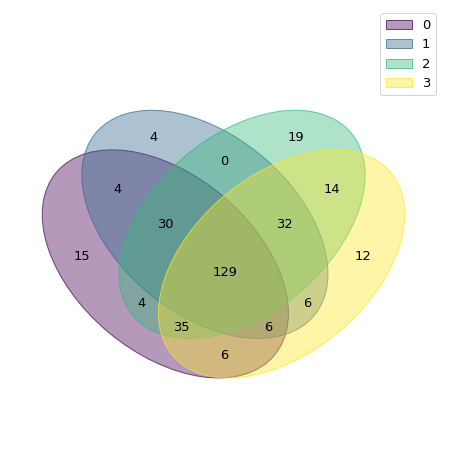

In [10]:
%matplotlib inline
venn(vars_donors)

## af dendro for these donor outputs (filter low variants)

0
curr_af shape
(7, 4204)
after filtering low count cells and vars
(7, 4159)
1
curr_af shape
(11, 3750)
after filtering low count cells and vars
(11, 3715)
2
curr_af shape
(26, 3073)
after filtering low count cells and vars
(26, 3063)
3
curr_af shape
(20, 3852)
after filtering low count cells and vars
(20, 3774)


Text(0.5, 1.0, 'Removing variants <0.1 AF in every cell')

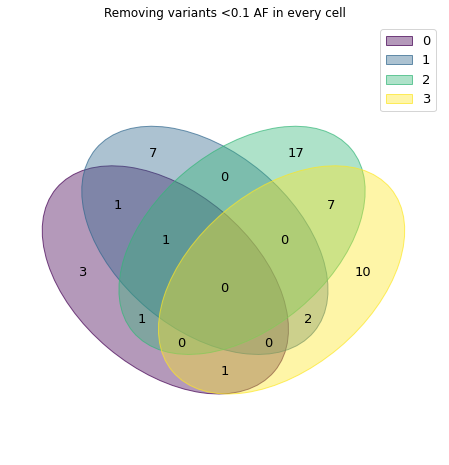

In [11]:
thresh = 0.01
stats = []
vars_donors_cov = {}
vars_donors_af = {}
cells_donors_af = {}
for d in np.arange(N_DONORS):
    print(d)
    curr_af = pd.read_csv(join(INDIR, f"donor{d}", "mgatk_donor", f"d{d}.af.tsv"), sep='\t')
    curr_cov = pd.read_csv(join(INDIR, f"donor{d}", "mgatk_donor", f"d{d}.coverage.tsv"), sep='\t')
    curr_af = curr_af.loc[get_high(curr_af, thresh=thresh)]
    print('curr_af shape')
    print(curr_af.shape)
    stats.append(curr_af.shape)
    curr_af = curr_af.loc[(~(curr_af == 0).all(axis=1)), (~(curr_af == 0).all(axis=0))]
    print("after filtering low count cells and vars")
    print(curr_af.shape)
    
    vars_donors_af[str(d)] = set(curr_af.index.values)
    cells_donors_af[str(d)] = set(curr_af.columns.values)
    stats.append(curr_af.shape)

%matplotlib inline
venn(vars_donors_af)
plt.title("Removing variants <0.1 AF in every cell")

0
curr_af shape
(103, 4204)
after filtering low count cells and vars
(103, 4197)
1
curr_af shape
(98, 3750)
after filtering low count cells and vars
(98, 3745)
2
curr_af shape
(135, 3073)
after filtering low count cells and vars
(135, 3071)
3
curr_af shape
(99, 3852)
after filtering low count cells and vars
(99, 3833)


<AxesSubplot:>

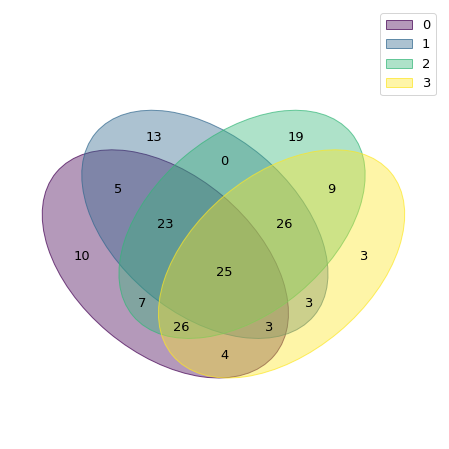

In [12]:
thresh = 0.001
stats = []
vars_donors_cov = {}
vars_donors_af = {}
cells_donors_af = {}
for d in np.arange(N_DONORS):
    print(d)
    curr_af = pd.read_csv(join(INDIR, f"donor{d}", "mgatk_donor", f"d{d}.af.tsv"), sep='\t')
    curr_cov = pd.read_csv(join(INDIR, f"donor{d}", "mgatk_donor", f"d{d}.coverage.tsv"), sep='\t')
    curr_af = curr_af.loc[get_high(curr_af, thresh=0.001)]
    print('curr_af shape')
    print(curr_af.shape)
    stats.append(curr_af.shape)
    curr_af = curr_af.loc[(~(curr_af == 0).all(axis=1)), (~(curr_af == 0).all(axis=0))]
    print("after filtering low count cells and vars")
    print(curr_af.shape)
    
    vars_donors_af[str(d)] = set(curr_af.index.values)
    cells_donors_af[str(d)] = set(curr_af.columns.values)
    stats.append(curr_af.shape)

%matplotlib inline
venn(vars_donors_af)

## Donor dendros

0
clustering


Generating palette: 100% |######################################| Time: 0:00:03


cmap None
clustering


Generating palette: 100% |######################################| Time: 0:00:02


cmap None
clustering


Generating palette: 100% |######################################| Time: 0:00:03


cmap None
1
clustering


Generating palette: 100% |######################################| Time: 0:00:02


cmap None
clustering


Generating palette: 100% |######################################| Time: 0:00:02


cmap None
clustering


Generating palette: 100% |######################################| Time: 0:00:03


cmap None
2
clustering


Generating palette: 100% |######################################| Time: 0:00:03


cmap None
clustering


Generating palette: 100% |######################################| Time: 0:00:02


cmap None
clustering


Generating palette: 100% |######################################| Time: 0:00:02


cmap None
3
clustering


Generating palette: 100% |######################################| Time: 0:00:03


cmap None
clustering


Generating palette: 100% |######################################| Time: 0:00:02


cmap None
clustering


Generating palette: 100% |######################################| Time: 0:00:02


cmap None


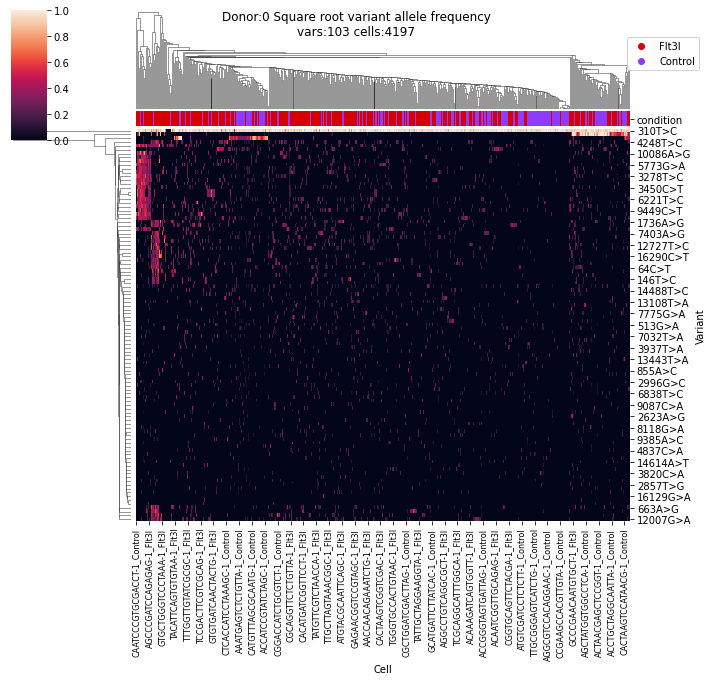

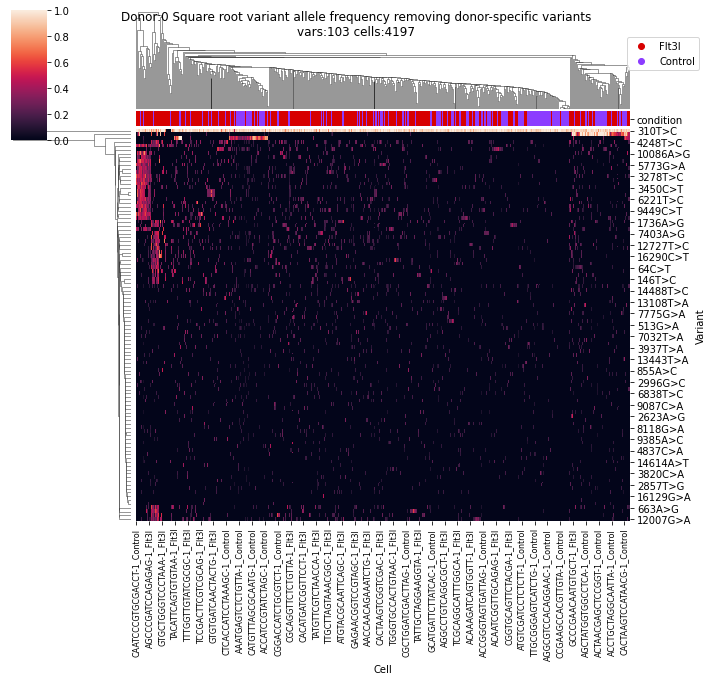

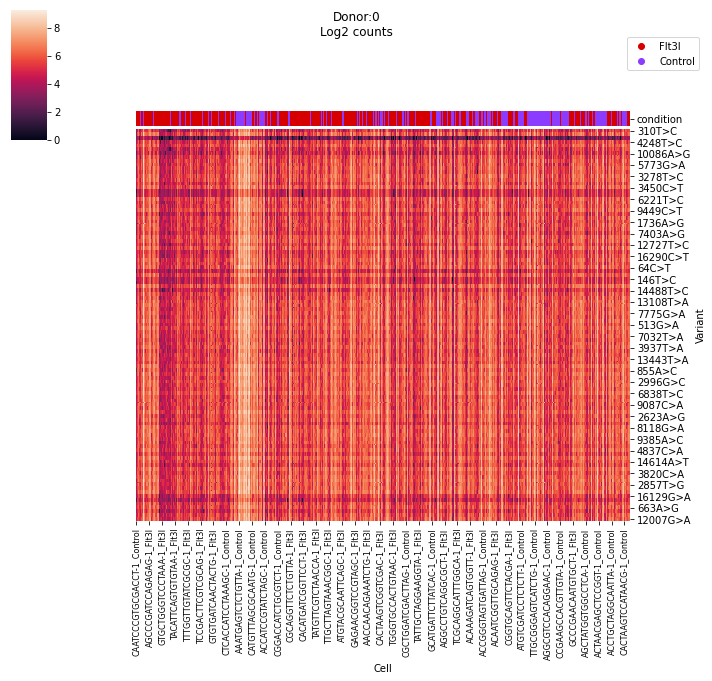

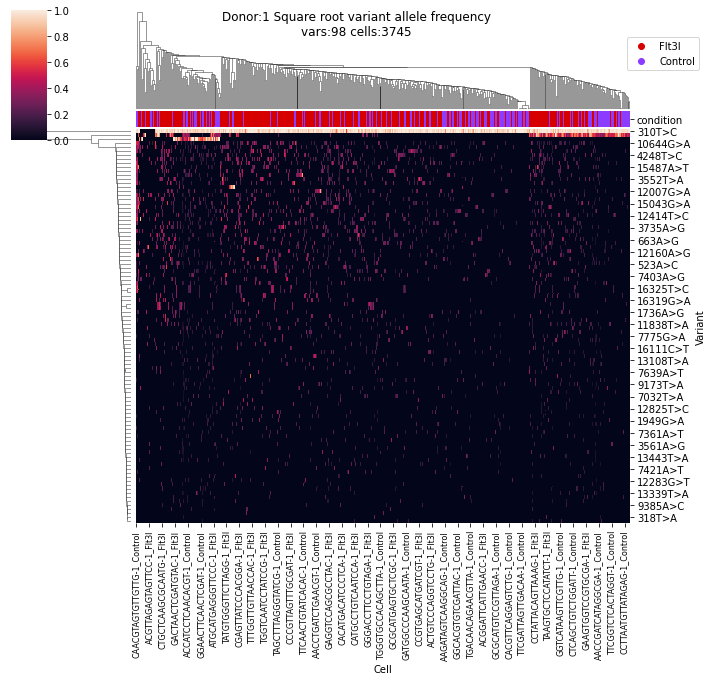

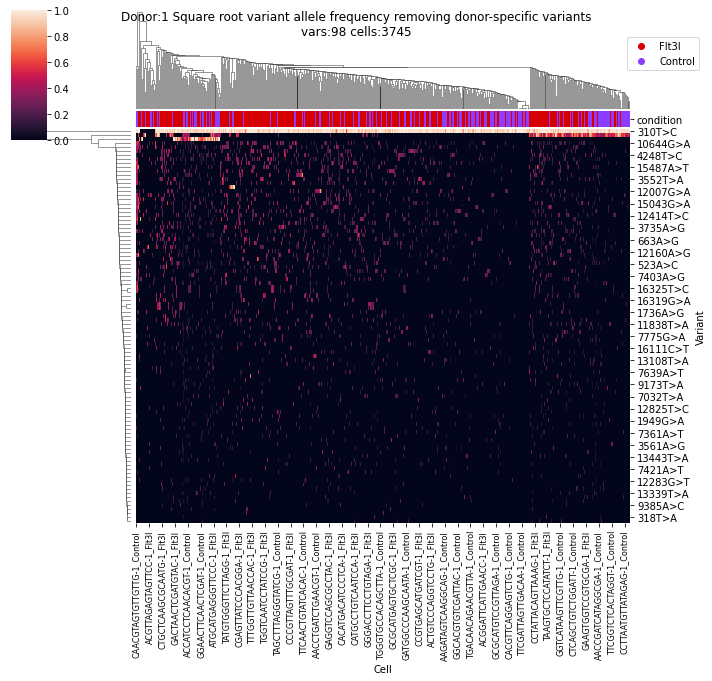

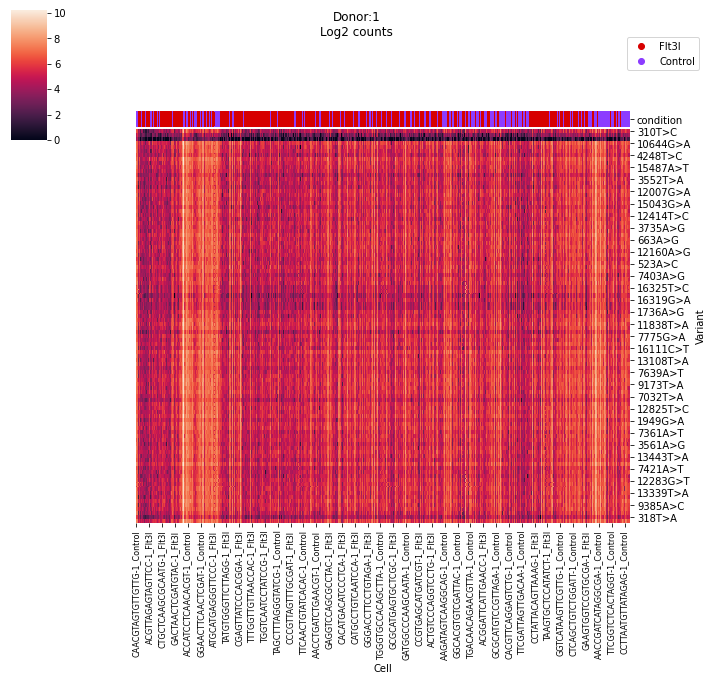

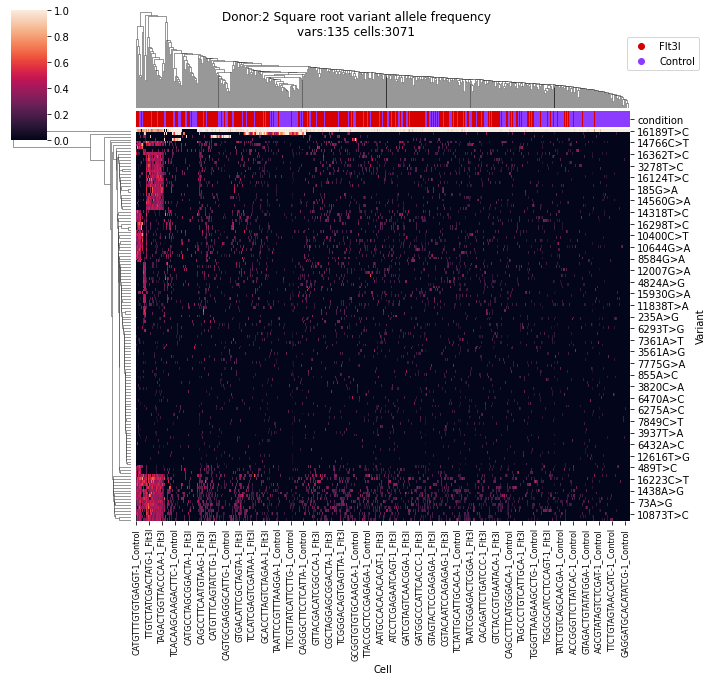

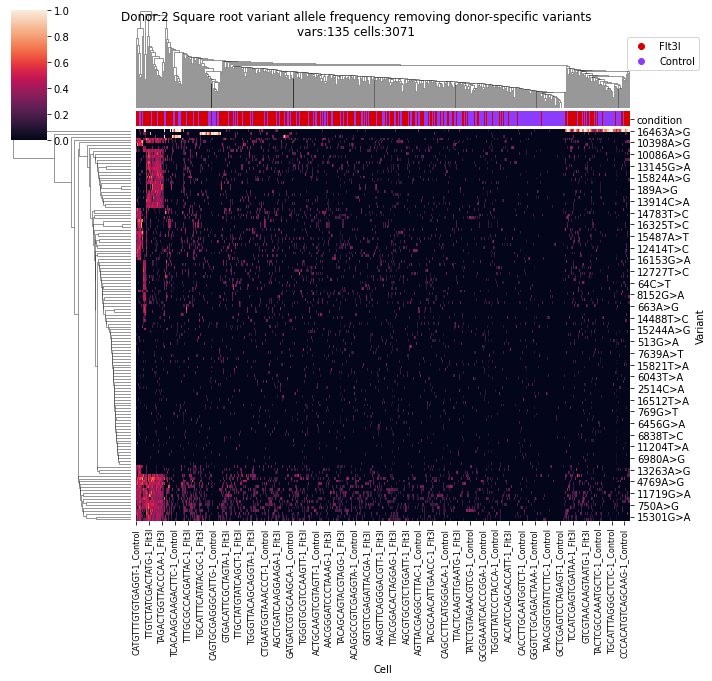

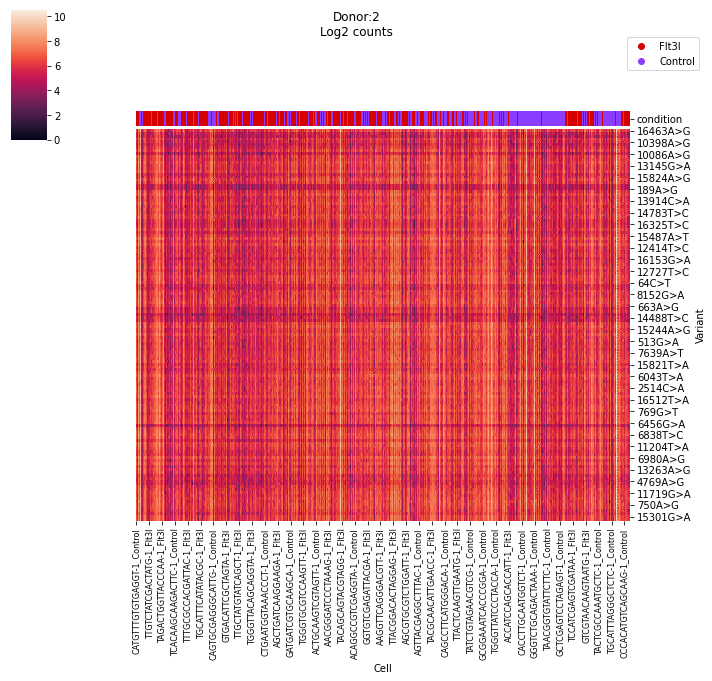

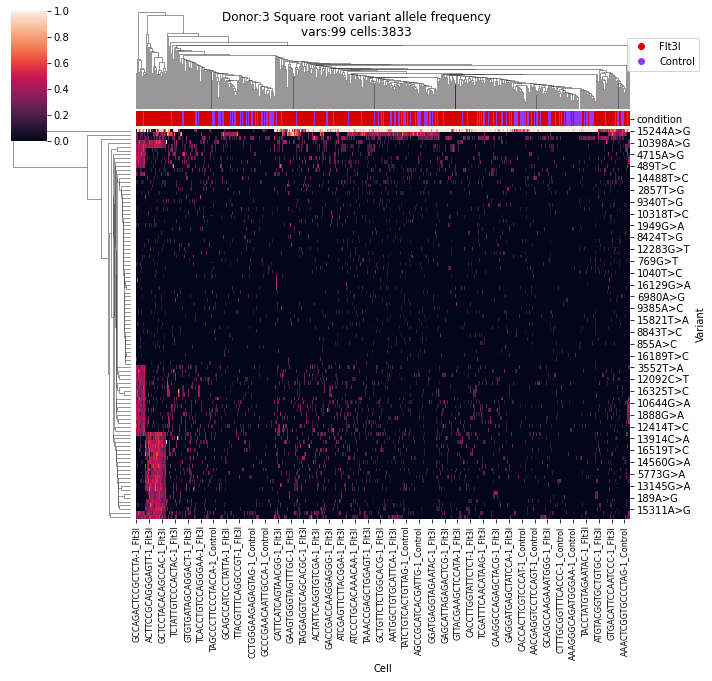

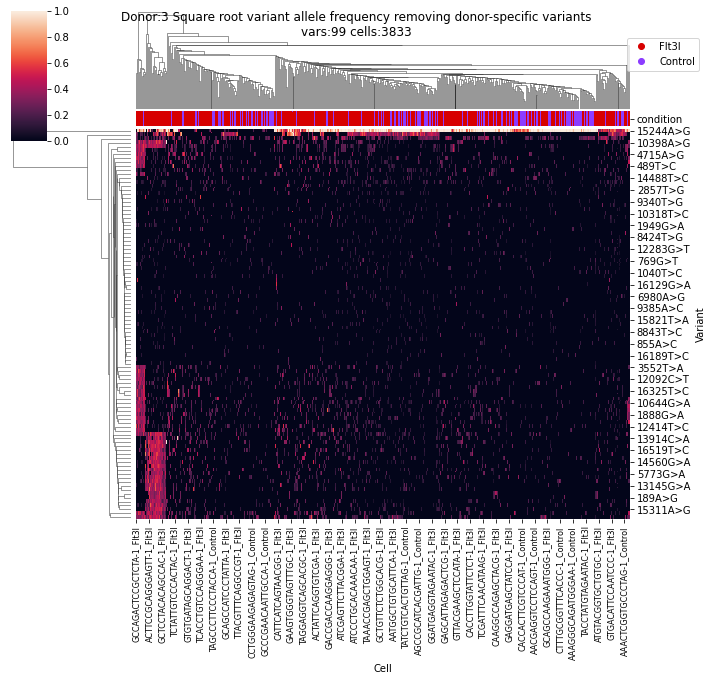

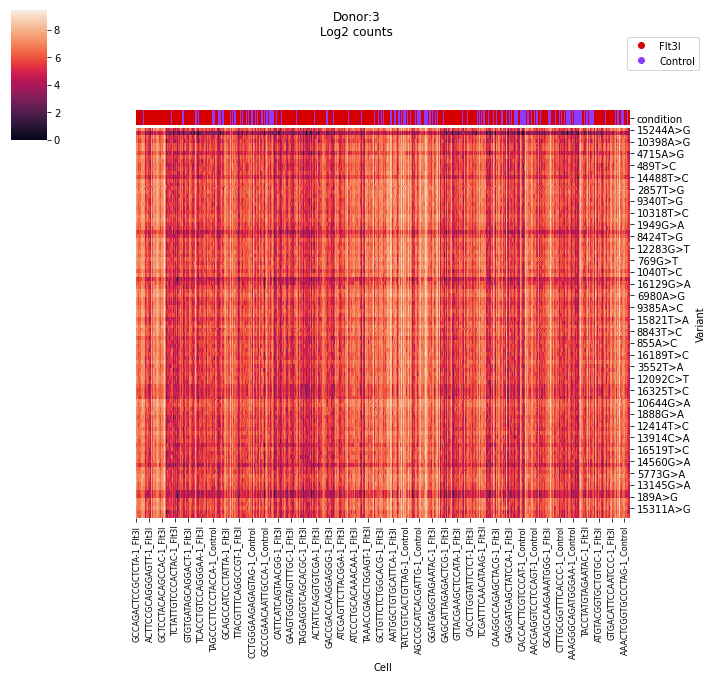

In [13]:
#n_clone_list = [7]#[2,3,4,5,6,7]
for d in np.arange(N_DONORS):
    print(d)
    AF_df = pd.read_csv(join(INDIR, f"donor{d}", "mgatk_donor", f"d{d}.af.tsv"), sep='\t')
    DP_df = pd.read_csv(join(INDIR, f"donor{d}", "mgatk_donor", f"d{d}.coverage.tsv"), sep='\t')
    AF_df = AF_df.loc[get_high(AF_df, thresh=0.001)]
    AF_df = AF_df.loc[(~(AF_df == 0).all(axis=1)), (~(AF_df == 0).all(axis=0))]
    #DP_df = DP_df.loc[AF_df.index, AF_df.columns]
    DP_df = DP_df.loc[DP_df.index.isin(AF_df.index), DP_df.columns.isin(AF_df.columns)]
    DP_df = DP_df.reindex(AF_df.index)
    DP_df = DP_df[AF_df.columns]
    out_f = join(OUTDIR,  f"donor{d}_dendrogram.png")
    DP_df.index.name = "Variant"
    DP_df.columns.name = "Cell"
    AF_df.index.name = "Variant"
    AF_df.columns.name = "Cell"
    curr_labels = pd.Series([x.split("_")[1] for x in AF_df.columns], index=AF_df.columns)
    curr_labels = pd.DataFrame(curr_labels).rename({0:"condition"}, axis=1)
    #AD_df = pd.merge(AD_df, vcf[["#CHROM", "POS", "ALT"]], how="inner", left_index=True,right_index=True).set_index(["#CHROM", "POS", "ALT"])
    #curr_labels = cells_meta.loc[cells_meta['donor']==n].copy().sort_values("donor_index").reset_index()    
    if (AF_df.shape[1] > 500):
        cols=np.random.choice(AF_df.columns,size=500, replace=False)
    else:
        cols = AF_df.columns
    if (AF_df.shape[0] > 500):
        rows = AF_df.mean(axis=1).sort_values(ascending=False).index[:500]
    else:
        rows = AF_df.index
    
    nvars = AF_df.shape[0]
    ncells = AF_df.shape[1]
    
    AF_df = AF_df.loc[rows,cols]
    DP_df = DP_df.loc[rows,cols]
    curr_labels = curr_labels.loc[cols]
    
    g = ch.plot_cluster(np.sqrt(AF_df), col_meta=curr_labels[["condition"]], to_row_clust=True, to_col_clust=True, use_white=False )
    #g = sns.clustermap(np.sqrt(AF_df), col_colors=curr_labels[["Color"]], to_row_clust=True, to_col_clust=True, metric='jaccard')
    plt.suptitle(f"Donor:{d} Square root variant allele frequency\nvars:{nvars} cells:{ncells}")
    plt.savefig(out_f+".withHigh.png")
    
    varsLow = get_low(AF_df, thresh=0.9)
    AF_df = AF_df.loc[varsLow]
    DP_df = DP_df.loc[varsLow]
    
    g = ch.plot_cluster(np.sqrt(AF_df), col_meta=curr_labels[["condition"]], to_row_clust=True, to_col_clust=True, use_white=False )
    
    plt.suptitle(f"Donor:{d} Square root variant allele frequency removing donor-specific variants\nvars:{nvars} cells:{ncells}")
    plt.savefig(out_f)
    
    inds = g.dendrogram_row.dendrogram["leaves"]
    cols = g.dendrogram_col.dendrogram["leaves"]

    ch.plot_cluster(np.log2(DP_df.iloc[inds, cols]+1), to_row_clust=False, to_col_clust=False, 
                            col_meta=curr_labels.iloc[cols][["condition"]], use_white=False)

    plt.suptitle(f"Donor:{d}\nLog2 counts")
    plt.savefig(out_f+".depth.png")